<img src="FigT2_001.PNG" width:auto align="left">
<img src="FigT2_002.PNG" width:auto align="left">

<img src="FigT2_003.PNG" width:auto align="left">
<img src="FigT2_004.PNG" width:auto align="left">

<img src="FigT2_005.PNG" width:auto align="left">

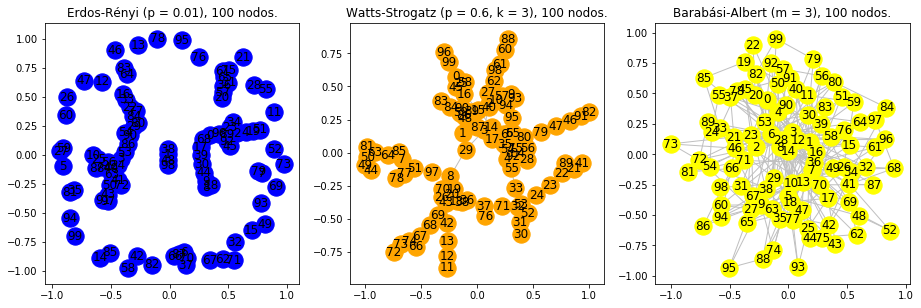

In [2]:
# Se importan las librerías a ser usadas.

%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Creación de grafo Erdos-Rényi (p = 0.01), de 100 nodos.
G_ER = nx.erdos_renyi_graph(100, 0.01)
# Creación de grafo Watts-Strogatz (p = 0.6, k = 3), de 100 nodos.
G_WS = nx.watts_strogatz_graph(100, 3, 0.6)
# Creación de grafo Barabási-Albert (m = 3), de 100 nodos.
G_BA = nx.barabasi_albert_graph(100, 3)

# Se grafican los 3 grafos

gs = gridspec.GridSpec(1, 3)

plt.figure(figsize=[15.5, 4.8])
ax = plt.subplot(gs[0, 0], title='Erdos-Rényi (p = 0.01), 100 nodos.')

pos  = nx.spring_layout(G_ER)
nx.draw_networkx(G_ER, edge_color='silver', node_color='blue', pos=pos);
ax = plt.subplot(gs[0, 1],title='Watts-Strogatz (p = 0.6, k = 3), 100 nodos.')
pos  = nx.spring_layout(G_WS)
nx.draw_networkx(G_WS, edge_color='silver', node_color='orange', pos=pos);
ax = plt.subplot(gs[0, 2], title='Barabási-Albert (m = 3), 100 nodos.')
pos  = nx.spring_layout(G_BA)
nx.draw_networkx(G_BA, edge_color='silver', node_color='yellow', pos=pos);
plt.show()

In [3]:
# Función paradoja_amistad(), que dado un grafo G, devuelve los valores <k>,  knn(k) = <k^2>/<k> y knn(k) - <k> 
def paradoja_amistad(G):
    deg = G.degree()
    sum, sum2 = 0, 0
    for i in range(0,G.number_of_nodes()):
        sum  += deg[i]
        sum2 += deg[i]*deg[i]
    k   = sum/G.number_of_nodes()
    knn = (sum2/G.number_of_nodes())/k
    return round(k,4), round(knn,4), round(knn-k,4)

print('PARADOJA DE LA AMISTAD ( knn(k) - <k> es positivo )')
x=paradoja_amistad(G_ER)
print('Grafo Erdos-Rényi (p = 0.01), con 100 nodos.')
print('<k> = {:>7} | knn(k) = {:>7} | knn(k) - <k> = {:>7}\n'.format(x[0], x[1],x[2]))

x=paradoja_amistad(G_WS)
print('Grafo Watts-Strogatz (p = 0.6, k = 3), con 100 nodos.')
print('<k> = {:>7} | knn(k) = {:>7} | knn(k) - <k> = {:>7}\n'.format(x[0], x[1],x[2]))

x=paradoja_amistad(G_BA)
print('Grafo Barabási-Albert (m = 3), con 100 nodos.')
print('<k> = {:>7} | knn(k) = {:>7} | knn(k) - <k> = {:>7}\n'.format(x[0], x[1],x[2]))




PARADOJA DE LA AMISTAD ( knn(k) - <k> es positivo )
Grafo Erdos-Rényi (p = 0.01), con 100 nodos.
<k> =    1.16 | knn(k) =   2.069 | knn(k) - <k> =   0.909

Grafo Watts-Strogatz (p = 0.6, k = 3), con 100 nodos.
<k> =     2.0 | knn(k) =     2.5 | knn(k) - <k> =     0.5

Grafo Barabási-Albert (m = 3), con 100 nodos.
<k> =    5.82 | knn(k) =  9.6323 | knn(k) - <k> =  3.8123



<img src="FigT2_006.PNG" width:auto align="left">

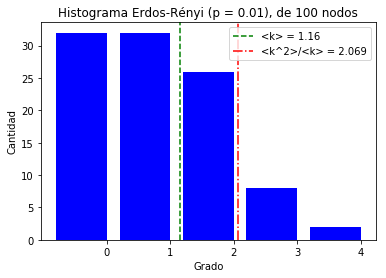

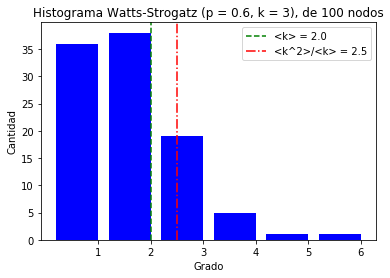

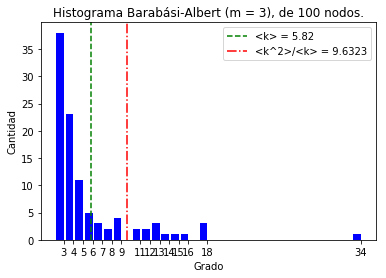

In [4]:
# Se importan las librerías a ser usadas.
import collections
import matplotlib.pyplot as plt
import networkx as nx

# Se define la función grafica_grafo(), que toma de entrada un grafo G y grafica su histograma.
def grafica_grafo(G, title='Histograma del gragfo G'):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title(title)
    plt.ylabel("Cantidad")
    plt.xlabel("Grado")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    x = paradoja_amistad(G)
    plt.axvline(x[0]+0.4, linewidth=1.5, color='g', label='<k> = {}'.format(x[0]), linestyle='--')
    plt.axvline(x[1]+0.4, linewidth=1.5, color='r', label='<k^2>/<k> = {}'.format(x[1]), linestyle='-.')
    plt.legend(('<k> = {}'.format(x[0]), '<k^2>/<k> = {}'.format(x[1])))

 
    
    plt.show()

grafica_grafo(G_ER,'Histograma Erdos-Rényi (p = 0.01), de 100 nodos')
grafica_grafo(G_WS,'Histograma Watts-Strogatz (p = 0.6, k = 3), de 100 nodos')
grafica_grafo(G_BA,'Histograma Barabási-Albert (m = 3), de 100 nodos.')

<img src="FigT2_007.PNG" width:auto align="left">

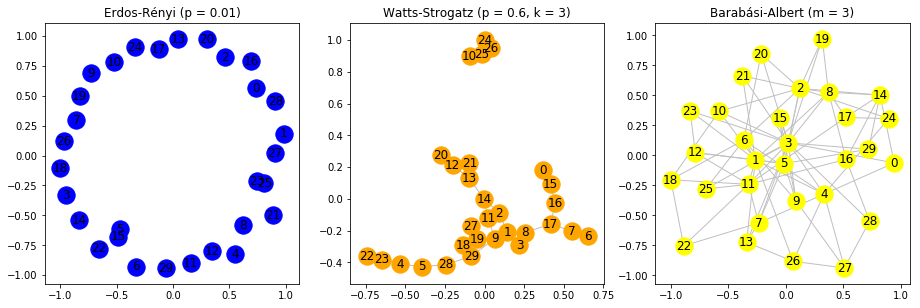

In [5]:
# Se importan las librerías a ser usadas.
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Creación de grafo Erdos-Rényi (p = 0.01), de 100 nodos.
G_ER = nx.erdos_renyi_graph(30, 0.01)
# Creación de grafo Watts-Strogatz (p = 0.6, k = 3), de 100 nodos.
G_WS = nx.watts_strogatz_graph(30, 3, 0.6)
# Creación de grafo Barabási-Albert (m = 3), de 100 nodos.
G_BA = nx.barabasi_albert_graph(30, 3)

# Se grafican los 3 grafos

gs = gridspec.GridSpec(1, 3)

plt.figure(figsize=[15.5, 4.8])
ax = plt.subplot(gs[0, 0], title='Erdos-Rényi (p = 0.01)')

pos  = nx.spring_layout(G_ER)
nx.draw_networkx(G_ER, edge_color='silver', node_color='blue', pos=pos);
ax = plt.subplot(gs[0, 1],title='Watts-Strogatz (p = 0.6, k = 3)')
pos  = nx.spring_layout(G_WS)
nx.draw_networkx(G_WS, edge_color='silver', node_color='orange', pos=pos);
ax = plt.subplot(gs[0, 2], title='Barabási-Albert (m = 3)')
pos  = nx.spring_layout(G_BA)
nx.draw_networkx(G_BA, edge_color='silver', node_color='yellow', pos=pos);



<img src="FigT2_008.PNG" width:auto align="left">

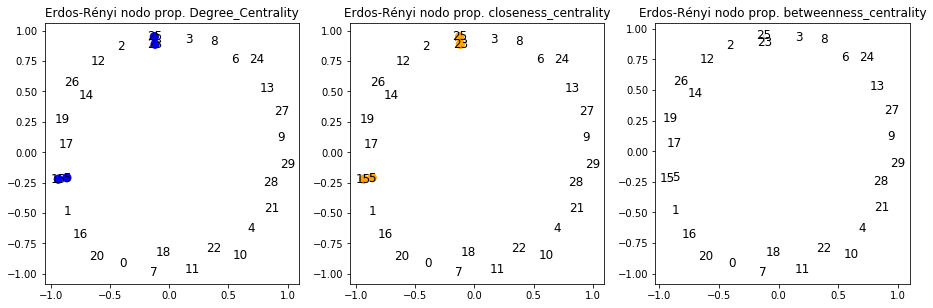

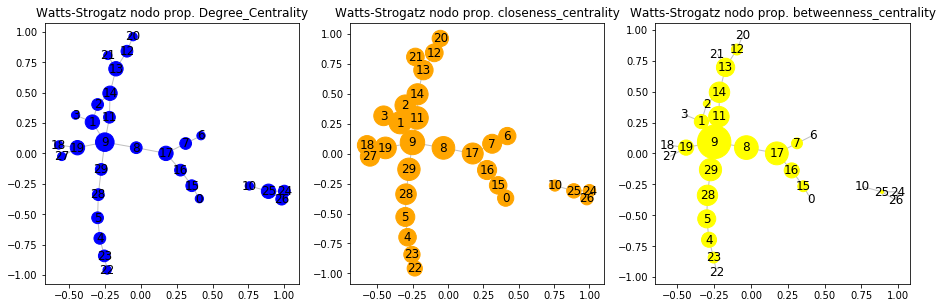

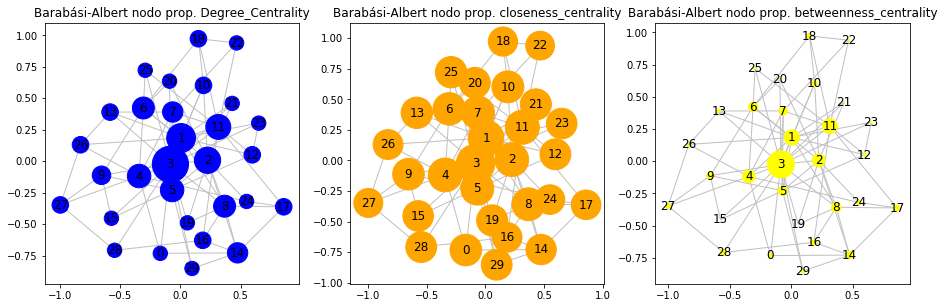

In [6]:
# Se importan las librerías a ser usadas.
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Se define la función grafica_tamaño_nodo_proporcional() que grafica un grafo con el tamaño de sus nodos proporcional
# a las medidas de centralidad indicadas.
def grafica_tamaño_nodo_proporcional(G, Tipo_Grafo='Grafo'):
    gs = gridspec.GridSpec(1, 3)
    plt.figure(figsize=[15.5, 4.8])
    
    pos = nx.spring_layout(G)

    ax = plt.subplot(gs[0, 0], title = Tipo_Grafo + ' nodo prop. Degree_Centrality')
    cent = nx.degree_centrality(G)
    nx.draw_networkx(G, node_size=[v * 2000 for v in cent.values()], edge_color='silver', node_color='blue', pos=pos)

    ax = plt.subplot(gs[0, 1], title = Tipo_Grafo + ' nodo prop. closeness_centrality')
    cent = nx.closeness_centrality(G)
    nx.draw_networkx(G, node_size=[v * 2000 for v in cent.values()], edge_color='silver', node_color='orange', pos=pos)


    ax = plt.subplot(gs[0, 2], title = Tipo_Grafo + ' nodo prop. betweenness_centrality')
    cent = nx.betweenness_centrality(G)
    nx.draw_networkx(G, node_size=[v * 2000 for v in cent.values()], edge_color='silver', node_color='yellow', pos=pos)

grafica_tamaño_nodo_proporcional(G_ER,'Erdos-Rényi')
grafica_tamaño_nodo_proporcional(G_WS,'Watts-Strogatz')
grafica_tamaño_nodo_proporcional(G_BA,'Barabási-Albert')

<img src="FigT2_009.PNG" width:auto align="left">

In [7]:
# Se importan las librerías a ser usadas.
import pandas as pd

# Se define la función genera_df(), que toma de parametro un grafo G, y genera un dataframe
# conforme lo pedido en la pregunta 2.b)
def genera_df(G):
    d_c = nx.degree_centrality(G)
    c_c = nx.closeness_centrality(G)
    b_c = nx.betweenness_centrality(G)

    ld_c  = []
    lc_c = []
    lb_c = []

    for i in d_c.values():
        ld_c.append(i)
    for i in c_c.values():
        lc_c.append(i)
    for i in b_c.values():
        lb_c.append(i)

 
    df_01 = pd.DataFrame(list(zip(list(d_c.keys()),ld_c, lc_c, lb_c)),
                         columns =['node_id','degree centrality', 'closeness centrality', 'betweenness centrality'])
    df_01.sort_values(by='degree centrality', ascending=False, inplace=True)
    df_01.reset_index(inplace=True, drop=True)
    df_01 = df_01.iloc[0:10].copy()
    return df_01

# Genera dataframe para grafo Erdos-Rényi
df_GER = genera_df(G_ER)
print('DATAFRAME DE GRAFO ERDOS-RÉNYI')
display(df_GER)

# Genera dataframe para grafo Watts-Strogatz
df_GWS = genera_df(G_WS)
print('\n\nDATAFRAME DE GRAFO WATTS-STROGATZ')
display(df_GWS)

# Genera dataframe para grafo Barabási-Albert
df_GBA = genera_df(G_BA)
print('\n\nDATAFRAME DE GRAFO BARABÁSI-ALBERT')
display(df_GBA)

DATAFRAME DE GRAFO ERDOS-RÉNYI


,node_id,degree centrality,closeness centrality,betweenness centrality
0,15,0.034483,0.034483,0.0
1,5,0.034483,0.034483,0.0
2,25,0.034483,0.034483,0.0
3,23,0.034483,0.034483,0.0
4,16,0.000000,0.000000,0.0
5,28,0.000000,0.000000,0.0
6,27,0.000000,0.000000,0.0
7,26,0.000000,0.000000,0.0
8,24,0.000000,0.000000,0.0
9,22,0.000000,0.000000,0.0




DATAFRAME DE GRAFO WATTS-STROGATZ


,node_id,degree centrality,closeness centrality,betweenness centrality
0,9,0.172414,0.299330,0.559113
1,13,0.103448,0.187406,0.167488
2,25,0.103448,0.103448,0.004926
3,19,0.103448,0.234258,0.115764
4,17,0.103448,0.219916,0.261084
5,1,0.103448,0.247721,0.100985
6,14,0.103448,0.222183,0.209360
7,15,0.068966,0.153941,0.059113
8,28,0.068966,0.211291,0.206897
9,26,0.068966,0.077586,0.000000




DATAFRAME DE GRAFO BARABÁSI-ALBERT


,node_id,degree centrality,closeness centrality,betweenness centrality
0,3,0.655172,0.743590,0.363303
1,1,0.413793,0.630435,0.116286
2,2,0.344828,0.568627,0.081812
3,11,0.310345,0.580000,0.110226
4,4,0.275862,0.568627,0.077323
5,5,0.275862,0.547170,0.041012
6,6,0.241379,0.527273,0.044117
7,8,0.241379,0.537037,0.045207
8,14,0.206897,0.460317,0.025498
9,7,0.206897,0.547170,0.034118


<img src="FigT2_010.PNG" width:auto align="left">
<img src="FigT2_012.PNG" width:"1500" align="left">

<img src="FigT2_011.PNG" width:auto align="left">
<img src="FigT2_013.PNG" width:auto align="left">
<img src="FigT2_014.PNG" width:auto align="left">
<img src="FigT2_015.PNG" width:auto align="left">